In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("twitter_training.csv")
df.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

In [3]:
cols = ["id", "entity", "category", "tweet"]

# Load datasets with headers
train_df = pd.read_csv("twitter_training.csv", header=None, names=cols)
val_df = pd.read_csv("twitter_validation.csv", header=None, names=cols)

# Check first rows
print(train_df.head())
print(val_df.head())

     id       entity  category  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
     id     entity    category  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                               tweet  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet

In [4]:
import re

def clean_tweet(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"#", "", text)  # remove hashtag symbol but keep word
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

# Apply cleaning
train_df["clean_tweet"] = train_df["tweet"].apply(clean_tweet)
val_df["clean_tweet"] = val_df["tweet"].apply(clean_tweet)

# Show before and after
for i in range(3):
    print("Before:", train_df["tweet"].iloc[i])
    print("After :", train_df["clean_tweet"].iloc[i])
    print("-----")


Before: im getting on borderlands and i will murder you all ,
After : im getting on borderlands and i will murder you all
-----
Before: I am coming to the borders and I will kill you all,
After : i am coming to the borders and i will kill you all
-----
Before: im getting on borderlands and i will kill you all,
After : im getting on borderlands and i will kill you all
-----


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return " ".join(lemmatized)

# Apply preprocessing to your dataset
train_df["processed_tweet"] = train_df["tweet"].apply(preprocess)
val_df["processed_tweet"] = val_df["tweet"].apply(preprocess)

# Example: Show before and after
for i in range(3):
    print("Original:", train_df["tweet"].iloc[i])
    print("Processed:", train_df["processed_tweet"].iloc[i])
    print("-----")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Incorta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Incorta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Incorta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original: im getting on borderlands and i will murder you all ,
Processed: im get borderland murder
-----
Original: I am coming to the borders and I will kill you all,
Processed: come border kill
-----
Original: im getting on borderlands and i will kill you all,
Processed: im get borderland kill
-----


In [6]:

import contractions

# Apply contractions.fix() to each document in the train_df["clean_tweet"] column
# This expands all contractions in every tweet
expanded_corpus = [contractions.fix(doc) for doc in train_df["clean_tweet"]]

# Print the new corpus after expanding contractions
print(expanded_corpus)

['i am getting on borderlands and i will murder you all', 'i am coming to the borders and i will kill you all', 'i am getting on borderlands and i will kill you all', 'i am coming on borderlands and i will murder you all', 'i am getting on borderlands and i will murder you me all', 'i am getting into borderlands and i can murder you all', 'so i spent a few hours making something for fun if you do not know i am a huge fan and maya is one of my favorite characters so i decided to make myself a wallpaper for my pc here is the original image versus the creation i made enjoy pictwittercommlsiwfjg', 'so i spent a couple of hours doing something for fun if you do not know that i am a huge borderlands fan and maya is one of my favorite characters i decided to make a wallpaper for my pc here is the original picture compared to the creation i made have fun pictwittercom mlsiwfjg', 'so i spent a few hours doing something for fun if you do not know i am a huge borderlands fan and maya is one of my

In [7]:
from textblob import TextBlob


# Option 2: SymSpell (much faster)
from symspellpy.symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)

suggestions = sym_spell.lookup("mesagee", Verbosity.CLOSEST, max_edit_distance=2)
for s in suggestions:
    print(s.term, s.distance, s.count)


2025-08-30 00:43:44,432: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.


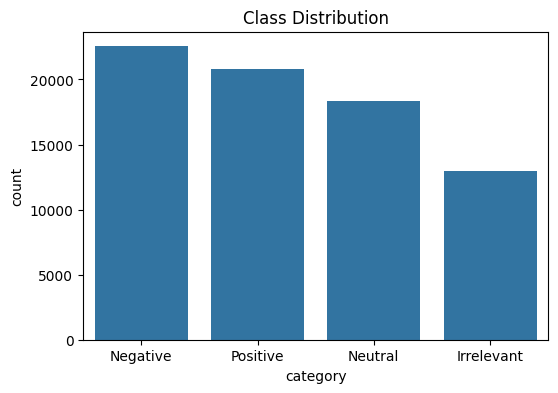

In [8]:
# 1. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="category", order=train_df["category"].value_counts().index)
plt.title("Class Distribution")
plt.show()

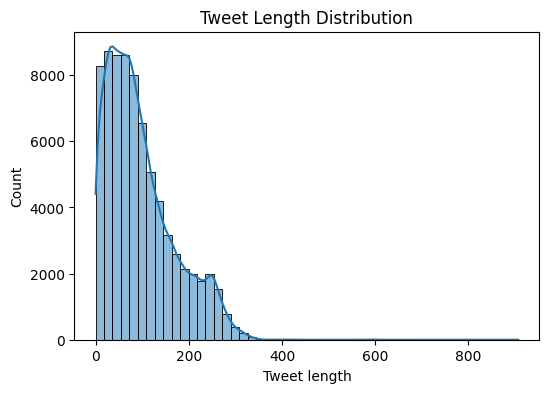

In [9]:
# 2. Tweet Length Distribution
train_df["tweet_length"] = train_df["clean_tweet"].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(train_df["tweet_length"], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet length")
plt.show()

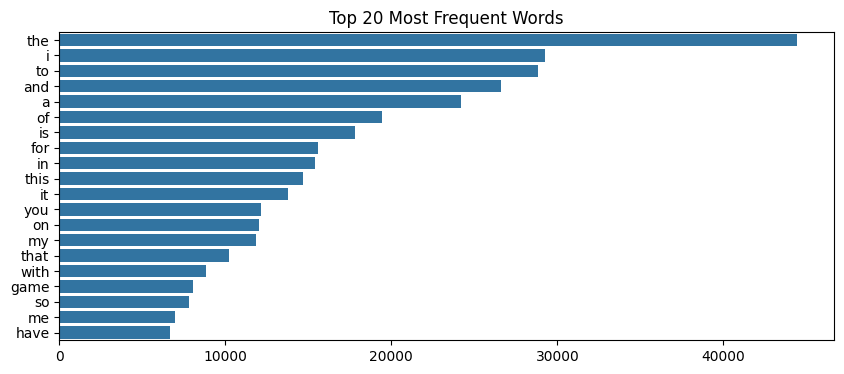

In [10]:
# 3. Most Frequent Words
from collections import Counter

all_words = " ".join(train_df["clean_tweet"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

plt.figure(figsize=(10,4))
sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words])
plt.title("Top 20 Most Frequent Words")
plt.show()

In [11]:
# 4. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
train_df.isnull().sum()

id                   0
entity               0
category             0
tweet              686
clean_tweet          0
processed_tweet      0
tweet_length         0
dtype: int64

In [ ]:
train_df.dropna(subset=['tweet'], inplace=True)

In [ ]:
train_df['category'].value_counts()

category
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [ ]:
train_df['tweet'].unique()

array(['im getting on borderlands and i will murder you all ,',
       'I am coming to the borders and I will kill you all,',
       'im getting on borderlands and i will kill you all,', ...,
       'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice',
       'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice',
       'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'],
      shape=(69491,), dtype=object)

In [ ]:
train_df.duplicated().sum()

np.int64(2340)

In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Prepare data
# -------------------
X = train_df["clean_tweet"]
y = train_df["category"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6642478370080938
              precision    recall  f1-score   support

  Irrelevant       0.65      0.49      0.56      2507
    Negative       0.69      0.77      0.73      4340
     Neutral       0.63      0.61      0.62      3542
    Positive       0.67      0.71      0.69      3943

    accuracy                           0.66     14332
   macro avg       0.66      0.64      0.65     14332
weighted avg       0.66      0.66      0.66     14332



In [ ]:
# Random Forest
# -------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.8598939436226626
              precision    recall  f1-score   support

  Irrelevant       0.94      0.76      0.84      2507
    Negative       0.84      0.91      0.88      4340
     Neutral       0.85      0.86      0.85      3542
    Positive       0.85      0.87      0.86      3943

    accuracy                           0.86     14332
   macro avg       0.87      0.85      0.86     14332
weighted avg       0.86      0.86      0.86     14332



In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train XGBoost classifier
xg_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xg_clf.fit(X_train_tfidf, y_train_enc)

# Predict
y_pred_xg = xg_clf.predict(X_test_tfidf)

# Evaluation
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test_enc, y_pred_xg))
print(classification_report(y_test_enc, y_pred_xg, target_names=le.classes_))

c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.640664247837008
              precision    recall  f1-score   support

  Irrelevant       0.74      0.37      0.50      2507
    Negative       0.59      0.83      0.69      4340
     Neutral       0.68      0.55      0.61      3542
    Positive       0.66      0.68      0.67      3943

    accuracy                           0.64     14332
   macro avg       0.67      0.61      0.62     14332
weighted avg       0.66      0.64      0.63     14332



In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Use processed tweets and encode labels
X = train_df["processed_tweet"]
y = train_df["category"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# Tokenization and padding
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Model for multi-class classification
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(len(le.classes_), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=64)

c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/f

Epoch 1/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.5969 - loss: 0.9717 - val_accuracy: 0.6710 - val_loss: 0.8119
Epoch 2/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.7295 - loss: 0.6870 - val_accuracy: 0.7293 - val_loss: 0.6901
Epoch 3/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.7861 - loss: 0.5490 - val_accuracy: 0.7553 - val_loss: 0.6382
Epoch 4/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8197 - loss: 0.4632 - val_accuracy: 0.7662 - val_loss: 0.6229
Epoch 5/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.8438 - loss: 0.3985 - val_accuracy: 0.7846 - val_loss: 0.6038
